# **#Fashion MNIST Data Classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

#load the data

In [ ]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#print shape

In [ ]:
X_train.shape,Y_train.shape,"************",X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), '************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
Y_train[0]

9

In [ ]:
Class_labels=("T-shirt/top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","Ankle boot")


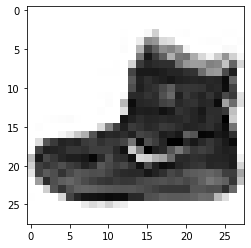

In [ ]:
plt.imshow(X_train[0],Cmap='Greys')

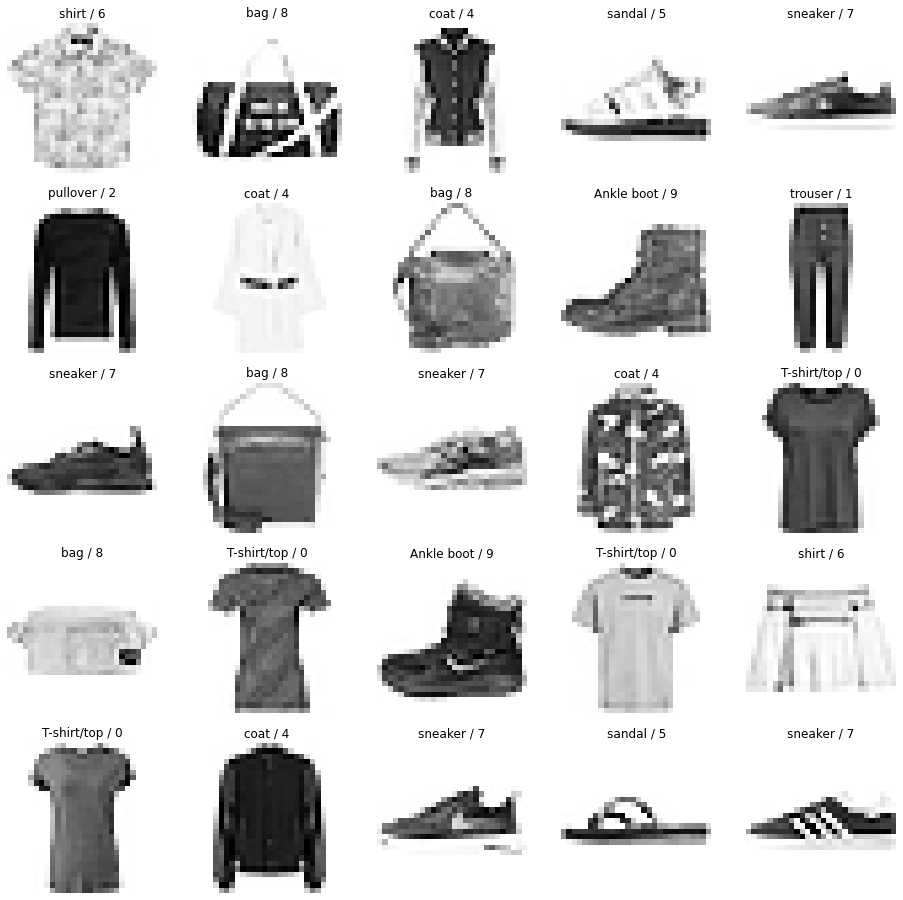

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(Class_labels[Y_train[i]],Y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train=np.expand_dims(X_train,-1)

In [ ]:
X_test=np.expand_dims(X_test,-1)

#features Scaling

In [ ]:
X_train=X_train/255
X_test=X_test/255

#split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_validation,Y_train,y_validation=train_test_split(X_train,Y_train,test_size=0.2,random_state=2020)

#building a ***CNN*** model

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,batch_size=512,epochs=10,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 43s 457ms/step - loss: 0.6312 - accuracy: 0.7884 - val_loss: 0.4296 - val_accuracy: 0.8492
Epoch 2/10
94/94 [==============================] - 20s 210ms/step - loss: 0.3783 - accuracy: 0.8670 - val_loss: 0.3811 - val_accuracy: 0.8627
Epoch 3/10
94/94 [==============================] - 20s 211ms/step - loss: 0.3270 - accuracy: 0.8858 - val_loss: 0.3361 - val_accuracy: 0.8842
Epoch 4/10
94/94 [==============================] - 26s 278ms/step - loss: 0.3037 - accuracy: 0.8924 - val_loss: 0.3116 - val_accuracy: 0.8928
Epoch 5/10
94/94 [==============================] - 20s 210ms/step - loss: 0.2808 - accuracy: 0.9007 - val_loss: 0.2971 - val_accuracy: 0.8961
Epoch 6/10
94/94 [==============================] - 22s 230ms/step - loss: 0.2584 - accuracy: 0.9086 - val_loss: 0.2906 - val_accuracy: 0.8991
Epoch 7/10
94/94 [==============================] - 20s 209ms/step - loss: 0.2456 - accuracy: 0.9119 - val_loss: 0.2889 - val_accuracy: 0.8974

In [ ]:
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 7ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.22, 0.04, 0.01]], dtype=float32)

In [ ]:
Y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2946 - accuracy: 0.8902


[0.2946320176124573, 0.8902000188827515]

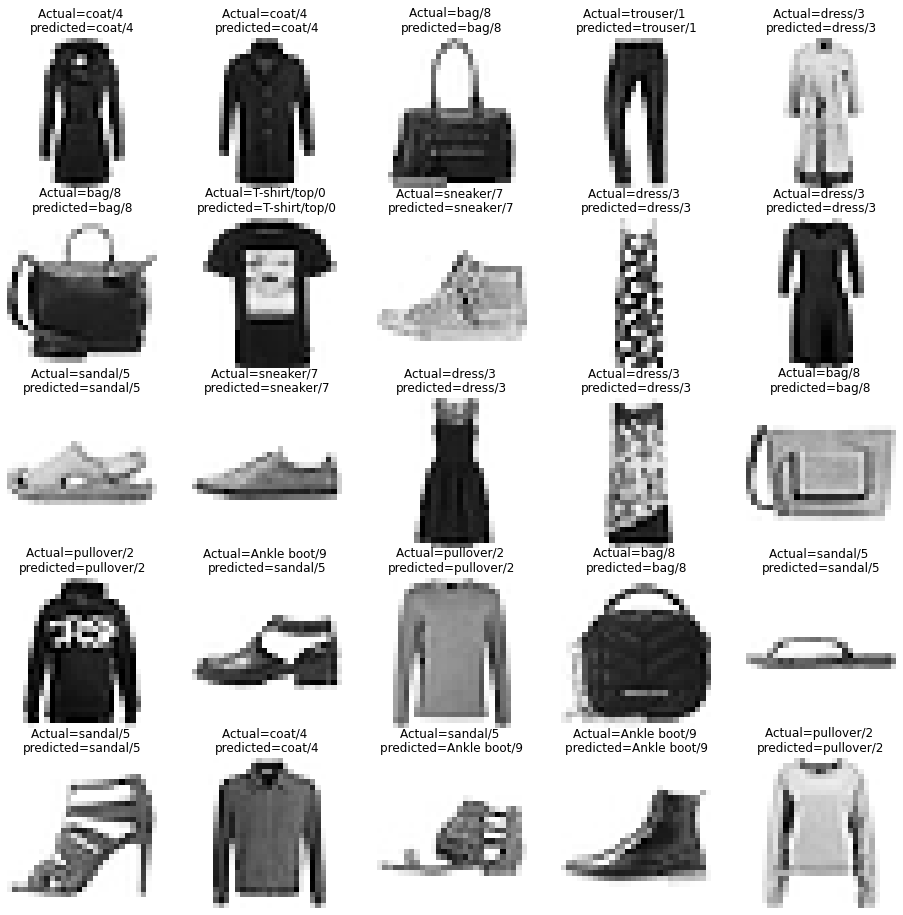

In [ ]:

plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={}/{} \npredicted={}/{}'.format(Class_labels[Y_test[i]],Y_test[i],Class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


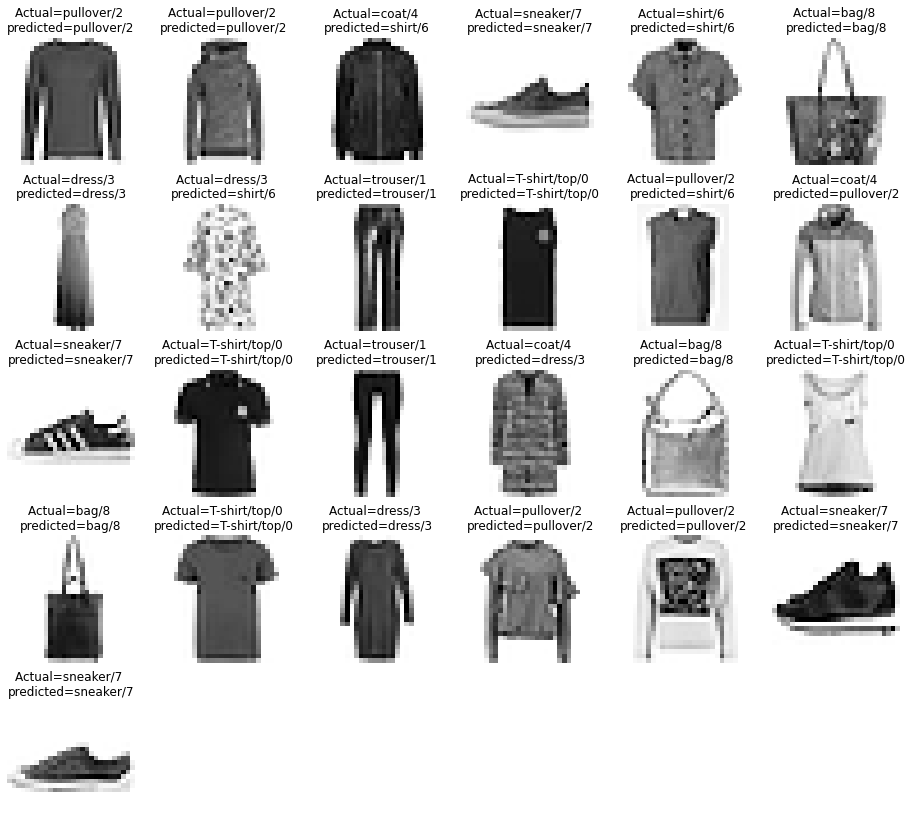

In [ ]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(10,6,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={}/{} \npredicted={}/{}'.format(Class_labels[Y_test[i]],Y_test[i],Class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


#confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(Y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.76      0.82      1000
     trouser       0.99      0.97      0.98      1000
    pullover       0.79      0.87      0.83      1000
       dress       0.89      0.93      0.91      1000
        coat       0.91      0.70      0.79      1000
      sandal       0.98      0.97      0.98      1000
       shirt       0.64      0.80      0.71      1000
     sneaker       0.94      0.97      0.96      1000
         bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



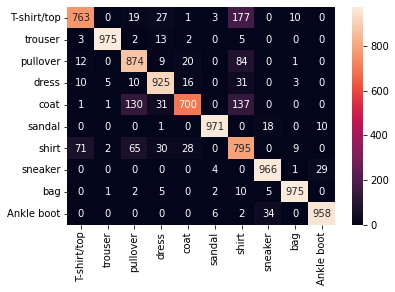

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=Class_labels,yticklabels=Class_labels)

from sklearn.metrics import classification_report
cr=classification_report(Y_test,y_pred_labels,target_names=Class_labels)
print(cr)


#saving the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('fashion_mnist_cnn_model.h5')

#Building 2 complex CNN

In [ ]:
#Building CNN model

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

cnn_model2=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

#compile the model
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the model


In [ ]:

cnn_model2.fit(X_train,Y_train,batch_size=512,epochs=20,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/20
94/94 [==============================] - 45s 473ms/step - loss: 0.8822 - accuracy: 0.6667 - val_loss: 0.5113 - val_accuracy: 0.8043
Epoch 2/20
94/94 [==============================] - 44s 465ms/step - loss: 0.4875 - accuracy: 0.8175 - val_loss: 0.4094 - val_accuracy: 0.8487
Epoch 3/20
94/94 [==============================] - 43s 462ms/step - loss: 0.3996 - accuracy: 0.8556 - val_loss: 0.3474 - val_accuracy: 0.8742
Epoch 4/20
94/94 [==============================] - 45s 482ms/step - loss: 0.3530 - accuracy: 0.8709 - val_loss: 0.3174 - val_accuracy: 0.8868
Epoch 5/20
94/94 [==============================] - 43s 461ms/step - loss: 0.3150 - accuracy: 0.8849 - val_loss: 0.2947 - val_accuracy: 0.8940
Epoch 6/20
94/94 [==============================] - 43s 462ms/step - loss: 0.2972 - accuracy: 0.8916 - val_loss: 0.2831 - val_accuracy: 0.8978
Epoch 7/20
94/94 [==============================] - 43s 461ms/step - loss: 0.2731 - accuracy: 0.8988 - val_loss: 0.2764 - val_accuracy: 0.8995

In [ ]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

#Building CNN model 3


In [ ]:
#Building CNN model3

cnn_model3=keras.models.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same',activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10,activation='softmax')
])

#compile the model
cnn_model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the model
cnn_model3.fit(X_train,Y_train,batch_size=512,epochs=50,verbose=1,validation_data=(x_validation,y_validation))

#saving the model
cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test,Y_test)

Epoch 1/50
94/94 [==============================] - 135s 1s/step - loss: 1.0337 - accuracy: 0.6014 - val_loss: 0.5371 - val_accuracy: 0.7875
Epoch 2/50
94/94 [==============================] - 133s 1s/step - loss: 0.5253 - accuracy: 0.8038 - val_loss: 0.4208 - val_accuracy: 0.8400
Epoch 3/50
94/94 [==============================] - 135s 1s/step - loss: 0.4270 - accuracy: 0.8475 - val_loss: 0.3514 - val_accuracy: 0.8698
Epoch 4/50
94/94 [==============================] - 132s 1s/step - loss: 0.3560 - accuracy: 0.8744 - val_loss: 0.3043 - val_accuracy: 0.8902
Epoch 5/50
94/94 [==============================] - 134s 1s/step - loss: 0.3139 - accuracy: 0.8898 - val_loss: 0.2911 - val_accuracy: 0.8933
Epoch 6/50
94/94 [==============================] - 132s 1s/step - loss: 0.2880 - accuracy: 0.8972 - val_loss: 0.2776 - val_accuracy: 0.8996
Epoch 7/50
94/94 [==============================] - 134s 1s/step - loss: 0.2675 - accuracy: 0.9055 - val_loss: 0.2602 - val_accuracy: 0.9068
Epoch 8/50
94

[0.4870823621749878, 0.9178000092506409]